## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



**Sperimentazione numerica**

In [ ]:
## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


In [23]:

import math
def sign(x):
    return math.copysign(1, x)


def metodo_bisezione(fname,a,b,tolx):
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb) >= 0:
        print("metodo di bisezione non applicabile")
        return None,None,None
    it=0
    v_xk = []

    while abs(b-a)>tolx:
        xk = a+(b-a)/2
        v_xk.append(xk)
        it+=1
        fxk = fname(xk)
        if fxk == 0: 
            return xk,it,v_xk

        if sign(fa*fxk) < 0: #la radice si trova nell'intervallo [a, xk]
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0: #la radice si trova nell'intervallo [#xk, b]
            a = xk
            fa = fxk
    return xk, it, v_xk


In [15]:
import numpy as np
import matplotlib.pyplot as plt

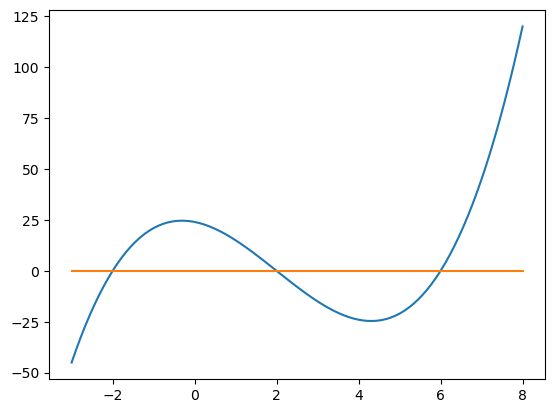

In [17]:
a = -3
b = 8
f= lambda x: x**3-6*x**2-4*x+24 
x = np.linspace(a, b, 100)
plt.plot(x, f(x), x, np.zeros_like(x))


radice =  -2.0000000000002274
iterazioni =  42
[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12 9.09494702e-13
 4.54747351e-13 2.27373675e-13]


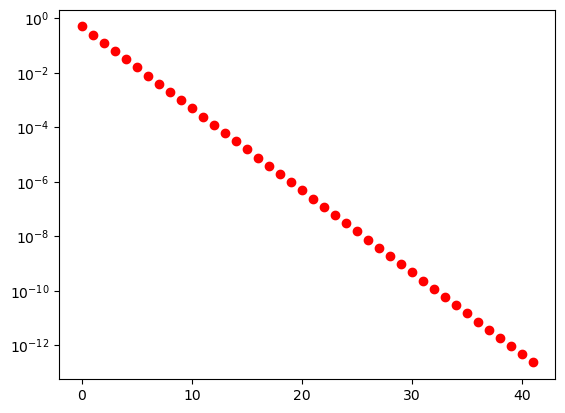

In [32]:
a1= -3.0
b1 = 0.0
tolx=1.0e-12
xk, it, v_xk = metodo_bisezione(f,a1, b1, tolx)
print("radice = ", xk)
print("iterazioni = ", it)
alpha = -2.0
ek=np.abs(np.array(v_xk)-alpha)
plt.semilogy(np.arange(it), ek, 'ro')
print(ek)

In [27]:
a2=  0.5
b2 = 4.0
tolx=1.0e-12
xk, it, v_xk = metodo_bisezione(f,a2, b2, tolx)
print("radice = ", xk)
print("iterazioni = ", it)

radice =  1.999999999999659
iterazioni =  42


In [36]:
a3=  4.0
b3 = 4.0
tolx=1.0e-12
xk, it, v_xk = metodo_bisezione(f,a3, b3, tolx)
print("radice = ", xk)
print("iterazioni = ", it)


metodo di bisezione non applicabile
radice =  None
iterazioni =  None


In [ ]:
def regula_falsi(fname,a,b,tolx):
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb) >= 0:
        print("metodo di bisezione non applicabile")
        return None,None,None
    it=0
    v_xk = []

    while abs(b-a)>tolx:
        xk = a+(b-a)/2
        v_xk.append(xk)
        it+=1
        fxk = fname(xk)
        if fxk == 0: 
            return xk,it,v_xk

        if sign(fa*fxk) < 0: #la radice si trova nell'intervallo [a, xk]
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0: #la radice si trova nell'intervallo [#xk, b]
            a = xk
            fa = fxk
    return xk, it, v_xk

## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg